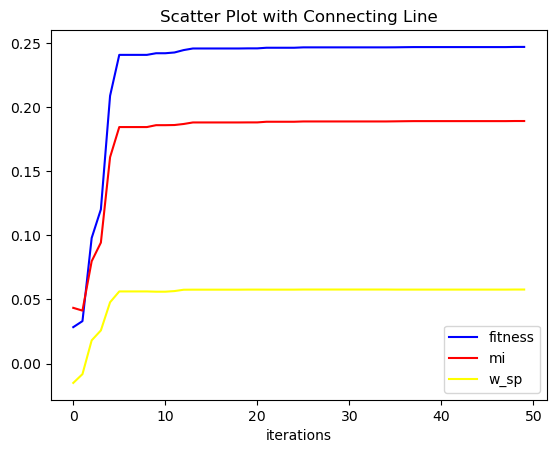

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 可视化不同迭代次数下的MI值
root_path = "D:/workspace/ml-workspace/registration/result/normal"
record_id = "test-4-2-2d-2-masked"
csv_path = f"{root_path}/{record_id}/pso_params_2d.csv"

# 读取 CSV 文件到 DataFrame
csv_datas = pd.read_csv(csv_path)
x = csv_datas['iterations']
fitness = csv_datas['fitness']
mi = csv_datas['mi']
weighted_sp = csv_datas['weighted_sp']


# 绘制散点图
# plt.scatter(x, y, color='red', label='Data Points')
# 绘制连接点的线
plt.plot(x, fitness, color='blue', label='fitness')
plt.plot(x, mi, color='red', label='mi')
plt.plot(x, weighted_sp, color='yellow', label='w_sp')

plt.legend()

# 添加标题和轴标签
plt.title('Scatter Plot with Connecting Line')
plt.xlabel('iterations')


# 显示图形
plt.show()

In [ ]:
# 使用itk加载CT图像
import itk
from itkwidgets import view

# 指定图像序列的目录
image_directory = "G:/CT/6/Reconstruction"

# 定义图像类型
PixelType = itk.UC  # 根据您的图像类型选择合适的像素类型
Dimension = 3
ImageType = itk.Image[PixelType, Dimension]

# 创建图像读取器
ReaderType = itk.ImageSeriesReader[ImageType]
reader = ReaderType.New()

# 创建用于读取 BMP 图像的图像IO
bmpIO = itk.BMPImageIO.New()
reader.SetImageIO(bmpIO)

# 创建并设置文件名生成器
nameGenerator = itk.NumericSeriesFileNames.New()
nameGenerator.SetSeriesFormat(image_directory + "/6-_rec00000125.bmp")
nameGenerator.SetStartIndex(1)
nameGenerator.SetEndIndex(10)  # 假设有 20 张图像
nameGenerator.SetIncrementIndex(1)
reader.SetFileNames(nameGenerator.GetFileNames())

# 读取图像
reader.Update()

# 获取读取的三维图像
image = reader.GetOutput()
print("Pixel Type:", image.GetPixelIDTypeAsString())

# 使用 itkwidgets 显示图像
view(image)

In [6]:
import itk
import numpy as np
from glob import glob
import os

BMP = ".bmp"
JPG = ".jpg"
TIF = ".tif"
# 指定图像序列的目录
ROOT = "G:/CT"

sample_id = 6
start_id = 185
end_id = 200

image_path = f"{ROOT}/{sample_id}/Reconstruction/"
if sample_id >= 1:
    file_extend_name = BMP
if sample_id >= 14:
    file_extend_name = JPG
if sample_id >= 18:
    file_extend_name = BMP
if sample_id >= 34:
    file_extend_name = TIF

def get_path(index):
    ct_prefix = f"{sample_id}-_IR_rec"
    if sample_id == 6:
        ct_prefix = f"{sample_id}-_rec"
    elif sample_id == 45 or sample_id == 52:
        ct_prefix = f"{sample_id}-1-_IR_rec"
    ct_name = f"{ct_prefix}{str(index).zfill(8)}{BMP}"
    ct_path = f"{image_path}/{ct_name}"
    return ct_path

arr_len = end_id - start_id
image_filenames = [get_path(i+start_id) for i in range(arr_len)]

images = [itk.imread(filename, itk.UC) for filename in image_filenames]
volume = itk.JoinSeriesImageFilter.New(Input=images)
volume.Update()

# 获取所有 BMP 文件的列表
all_files = sorted(glob(os.path.join(image_directory, '*.bmp')))

# 选择需要的图像数，例如：前10张图像
selected_files = all_files[:10]  # 可以修改这里选择不同的图像

# 读取第一张图像以获取大小信息
first_image = itk.imread(selected_files[0])

# 检查图像是否为 RGB，如果是，则转换为灰度
if first_image.GetNumberOfComponentsPerPixel() > 1:
    RGBToLuminance = itk.RGBToLuminanceImageFilter.New()
    RGBToLuminance.SetInput(first_image)
    RGBToLuminance.Update()
    first_image = RGBToLuminance.GetOutput()

size2d = first_image.GetLargestPossibleRegion().GetSize()
size3d = (size2d[0], size2d[1], len(selected_files))  # 创建三维大小

# 创建一个空的 NumPy 数组
array = np.zeros(size3d, dtype=np.uint8)

# 填充数组
for i, filename in enumerate(selected_files):
    image = itk.imread(filename)
    # 再次检查并转换 RGB 图像为灰度
    if image.GetNumberOfComponentsPerPixel() > 1:
        RGBToLuminance.SetInput(image)
        RGBToLuminance.Update()
        image = RGBToLuminance.GetOutput()
    array[:,:,i] = itk.array_from_image(image)

# 使用 matplotlib 显示第一个图像切片
plt.imshow(array[:,:,0], cmap='gray')
plt.show()

# # 将 NumPy 数组转换回 ITK 图像
# itk_image = itk.image_from_array(array)

# # 使用 itkwidgets 显示图像
# view(itk_image)

TemplateTypeError: itk.JoinSeriesImageFilter is not wrapped for input type `None`.

To limit the size of the package, only a limited number of
types are available in ITK Python. To print the supported
types, run the following command in your python environment:

    itk.JoinSeriesImageFilter.GetTypes()

Possible solutions:
* If you are an application user:
** Convert your input image into a supported format (see below).
** Contact developer to report the issue.
* If you are an application developer, force input images to be
loaded in a supported pixel type.

    e.g.: instance = itk.JoinSeriesImageFilter[itk.Image[itk.SS,2], itk.Image[itk.SS,3]].New(my_input)

* (Advanced) If you are an application developer, build ITK Python yourself and
turned to `ON` the corresponding CMake option to wrap the pixel type or image
dimension you need. When configuring ITK with CMake, you can set
`ITK_WRAP_${type}` (replace ${type} with appropriate pixel type such as
`double`). If you need to support images with 4 or 5 dimensions, you can add
these dimensions to the list of dimensions in the CMake variable
`ITK_WRAP_IMAGE_DIMS`.

Supported input types:

itk.Image[itk.SS,2]
itk.Image[itk.UC,2]
itk.Image[itk.US,2]
itk.Image[itk.F,2]
itk.Image[itk.D,2]
itk.Image[itk.SS,2]
itk.Image[itk.UC,2]
itk.Image[itk.US,2]
itk.Image[itk.F,2]
itk.Image[itk.D,2]
itk.Image[itk.SS,3]
itk.Image[itk.UC,3]
itk.Image[itk.US,3]
itk.Image[itk.F,3]
itk.Image[itk.D,3]


In [ ]:
import itk
import numpy as np

# 读取三维图像
image = itk.imread("path/to/your/image.nii")

# 定义旋转变换以调整切片方向
transform = itk.Euler3DTransform.New()
transform.SetRotation(np.radians(45), np.radians(45), np.radians(45))  # 以45度为例，可根据需要调整

# 使用变换重采样图像
resample_filter = itk.ResampleImageFilter.New(Input=image, Transform=transform)
resample_filter.SetSize(image.GetLargestPossibleRegion().GetSize())
resample_filter.SetOutputOrigin(image.GetOrigin())
resample_filter.SetOutputSpacing(image.GetSpacing())
resample_filter.Update()

# 定义所需切片的大小和位置
size = list(image.GetLargestPossibleRegion().GetSize())
size[0] = 0  # 设置 x 方向大小为 0（或者选择其他方向）
region = itk.ImageRegion[3]()
region.SetSize(size)
region.SetIndex([25, 25, 25])  # 选择开始的索引，可以调整

# 使用 ExtractImageFilter 提取切片
extract_filter = itk.ExtractImageFilter.New(Input=resample_filter.GetOutput(), ExtractionRegion=region)
extract_filter.Update()

# 获取切片
slice_image = extract_filter.GetOutput()

# 将切片转换为 NumPy 数组并显示
slice_array = itk.GetArrayFromImage(slice_image)

# 使用 Matplotlib 显示切片
import matplotlib.pyplot as plt
plt.imshow(slice_array, cmap='gray')
plt.axis('off')
plt.show()
